# Supervised Learning Project

In [1797]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1798]:
df = pd.read_csv("model.csv")

In [1799]:
df["Target"].value_counts()

0    69878
1    32473
Name: Target, dtype: int64

## Data Cleaning & EDA

#### DownSampling

In [1800]:
""""from sklearn.utils import resample

df_majority = df[df.Target==0] 
df_minority = df[df.Target==1] 
 
#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=32473,  # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine minority class with downsampled majority class
df = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
df.Target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset"""

'"from sklearn.utils import resample\n\ndf_majority = df[df.Target==0] \ndf_minority = df[df.Target==1] \n \n#2) Downsample majority class\ndf_majority_downsampled = resample(df_majority, \n                                   replace=False,\n                                   n_samples=32473,  # number of samples into the minority class (change it accordingly to your dataset)\n                                   random_state=123)  # reproducible results\n \n#3) Combine minority class with downsampled majority class\ndf = pd.concat([df_majority_downsampled, df_minority])\n \n#4) Display new class counts\ndf.Target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset'

#### Upsamplig

In [1801]:
""""from sklearn.utils import resample

#Over-sample Minority Class
#1) Separate majority and minority classes
df_majority = df[df.Target==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = df[df.Target==1] #"target" is the name of the target column, change it accordingly to your dataset
 
#2) Oversample minority class
df_minority_oversampled = resample(df_minority, 
                                   replace=True,
                                   n_samples=69878,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results
 
#3) Combine oversampled minority class with majority class
df = pd.concat([df_minority_oversampled, df_majority])
 
#4) Display new class counts
df.Target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset"""

'"from sklearn.utils import resample\n\n#Over-sample Minority Class\n#1) Separate majority and minority classes\ndf_majority = df[df.Target==0] #"target" is the name of the target column, change it accordingly to your dataset\ndf_minority = df[df.Target==1] #"target" is the name of the target column, change it accordingly to your dataset\n \n#2) Oversample minority class\ndf_minority_oversampled = resample(df_minority, \n                                   replace=True,\n                                   n_samples=69878,     # number of samples into the minority class (change it accordingly to your dataset)\n                                   random_state=123)  # reproducible results\n \n#3) Combine oversampled minority class with majority class\ndf = pd.concat([df_minority_oversampled, df_majority])\n \n#4) Display new class counts\ndf.Target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset'

In [1802]:
df

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


### Upsampling

### ANALYSIS OF CAT VARIABLES

In [1803]:
cat_cols=["Gender", "Driving_License","Licence_Type", "Region_Code","Previously_Insured", "Vehicle_Age", "Vehicle_Damage","Policy_Sales_Channel"]

In [1804]:
for column in df[cat_cols]:
    print(df[column].unique())

['Female' 'Male']
[1 0]
['M' 'C' 'B' 'A' 'D' nan]
[30  3 28 46  8 29 23 41 36 50 18 15 25 51 17 26 16 44 35  9 32 14 38 33
  6 19 34 49 10 45 27 39 48 47 11 22 43 31  7 21 12 13 37  2 24 42 20  1
  5  4 40  0 52]
['No' 'Yes']
['1-2 Year' '< 1 Year' '> 2 Years']
['Yes' 'No']
[154 152  52  26 124 157  78  11 156  25 163  30 160   8   3 122  29 151
 150  31  91  65  16  12   4 158 155 125 136   7  24 140  15  61 106   9
 153 138  13  55 109 111   1 120  23  35 116 103  60 133 135  22  14  92
  44  10  88  64  18 147  19 145 127  42 108  63 113 117  59  90  56 139
 159 148 131 119  40  80  86  96 128 121  50   6 123  39 130 110  21 146
  37  98  53  94 107 114  20  70  66 129  93  17  45  73  54  46 118  36
  51 100  48  47  81  32  82 132  99 105  89  49  67  58   2  76 137  97
 134  68  79  38  87  75  71  41  69 101  57 115  28 104  62 149]


#### Gender

<BarContainer object of 2 artists>

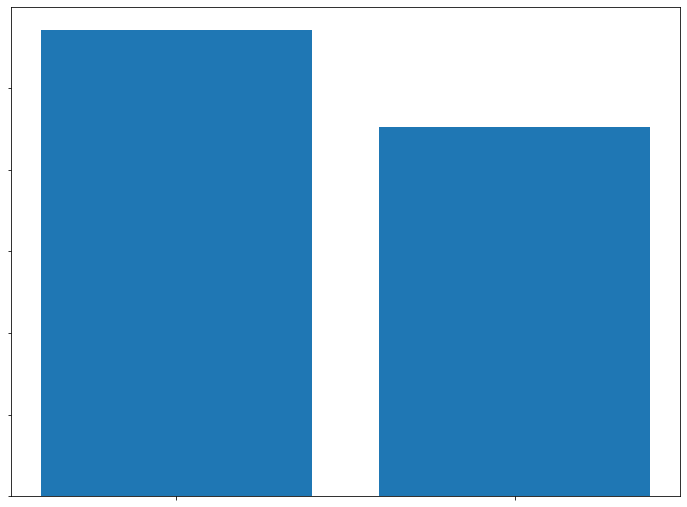

In [1805]:
plt.bar(df["Gender"].value_counts().index, df["Gender"].value_counts())

#### Driving_Licence

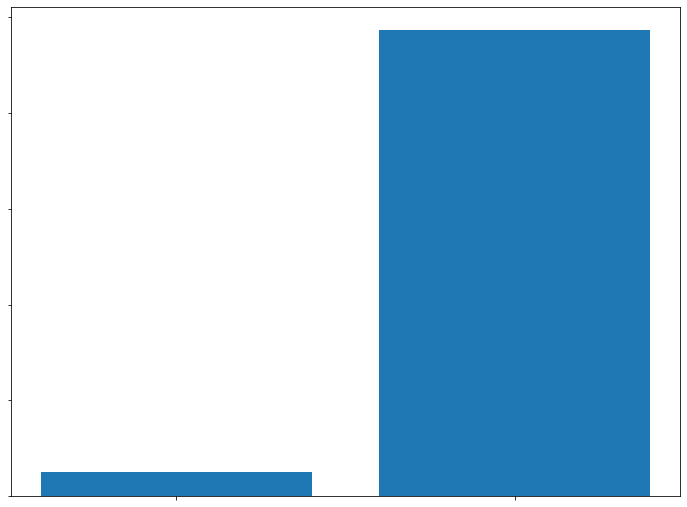

In [1806]:
plt.bar(df["Driving_License"].value_counts().index, df["Driving_License"].value_counts())
ax = plt.gca()
ax.set_xticks([0,1])

#### Licence_Type
- Notice the uniform distribution-->should we drop? Not naive

<BarContainer object of 5 artists>

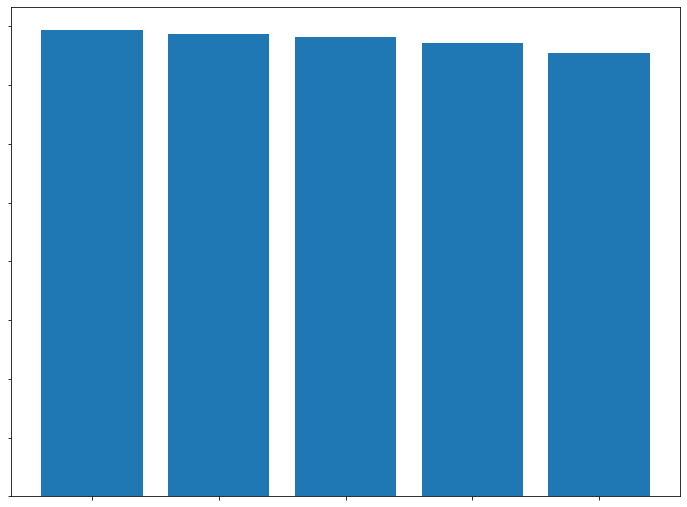

In [1807]:
plt.bar(df["Licence_Type"].value_counts().index, df["Licence_Type"].value_counts())

#### Region_Code

#### Region Code is categorical but has a huge categories numbers-->Label all the values present than a given threshold as "Others"

In [1808]:
df["Region_Code"].value_counts()

28    31765
8      8605
46     5182
41     4926
15     3301
30     3008
29     2932
3      2482
11     2470
50     2447
36     2305
33     2010
35     1937
47     1849
6      1517
45     1446
18     1372
37     1344
39     1270
14     1212
48     1168
21     1045
13     1026
10      994
2       991
7       906
12      839
9       727
32      722
27      708
17      667
24      666
43      639
26      633
25      614
38      609
23      536
20      517
31      506
4       504
0       491
49      477
16      474
19      428
34      407
40      348
5       334
22      305
1       232
44      189
42      137
52       70
51       62
Name: Region_Code, dtype: int64

In [1809]:
df["Region_Code"].value_counts().values[4:].sum()

51873

In [1810]:
df["Region_Code"].value_counts().values[:4].sum()

50478

In [1811]:
counts = df['Region_Code'].value_counts()
idx = counts[counts.lt(4000)].index
df.loc[df['Region_Code'].isin(idx), 'Region_Code'] = "Other"

In [1812]:
df["Region_Code"].value_counts()

Other    51873
28       31765
8         8605
46        5182
41        4926
Name: Region_Code, dtype: int64

In [1813]:
""""plt.bar(df["Region_Code"].value_counts().index, df["Region_Code"].value_counts())
ax = plt.gca()
ax.set_xticks(["Other","28","8","46","41"]"""

'"plt.bar(df["Region_Code"].value_counts().index, df["Region_Code"].value_counts())\nax = plt.gca()\nax.set_xticks(["Other","28","8","46","41"]'

#### Vehicle_Age

<BarContainer object of 3 artists>

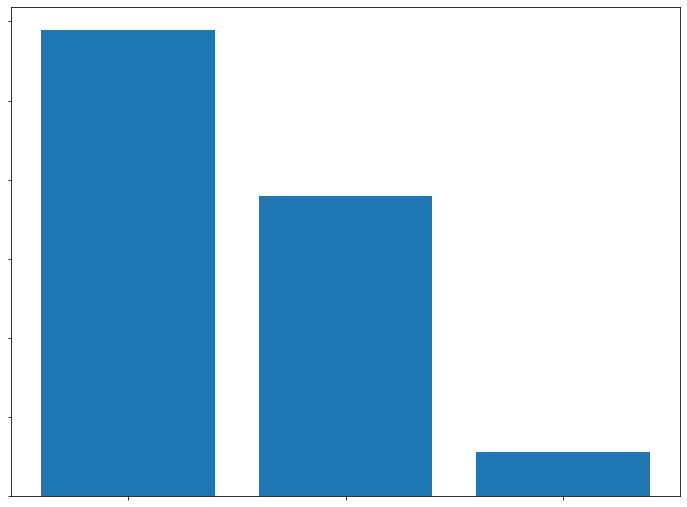

In [1814]:
plt.bar(df["Vehicle_Age"].value_counts().index, df["Vehicle_Age"].value_counts())

#### Vehicle_Damage

<BarContainer object of 2 artists>

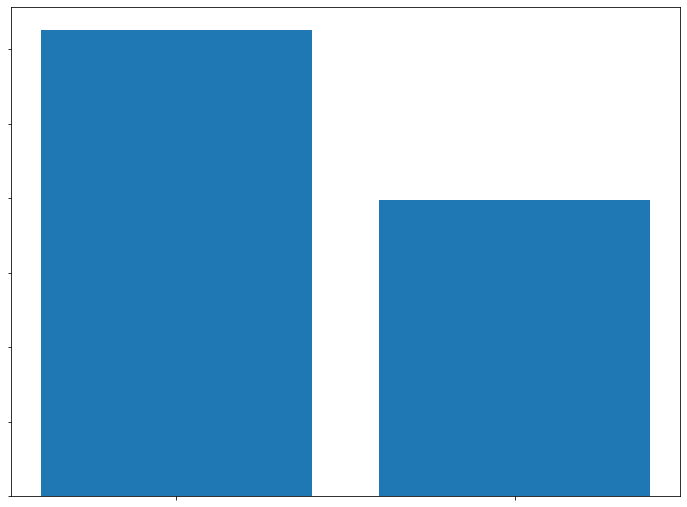

In [1815]:
plt.bar(df["Vehicle_Damage"].value_counts().index, df["Vehicle_Damage"].value_counts())

#### Policy_Sales_Channel

<BarContainer object of 142 artists>

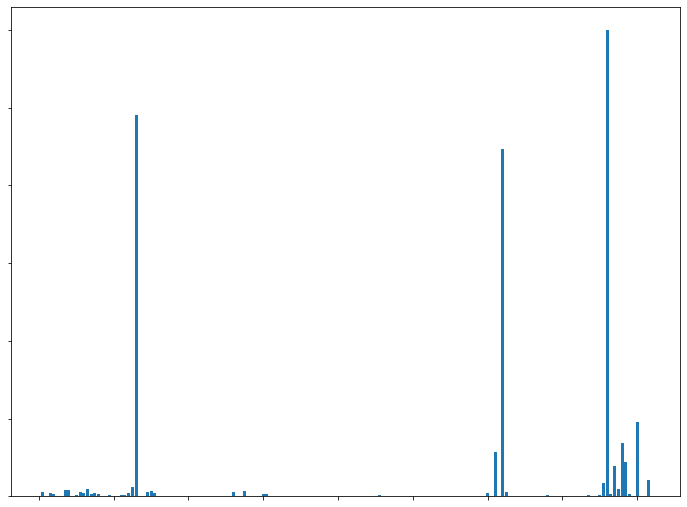

In [1816]:
plt.bar(df["Policy_Sales_Channel"].value_counts().index, df["Policy_Sales_Channel"].value_counts())

In [1817]:
df["Policy_Sales_Channel"].value_counts()

152    29978
26     24504
124    22317
160     4778
156     3424
       ...  
73         1
137        1
75         1
117        1
41         1
Name: Policy_Sales_Channel, Length: 142, dtype: int64

##### Here I will label all the values of the cat column "Policy_Sales_Channel" present less than 20000 times as "Others"

In [1818]:
counts = df['Policy_Sales_Channel'].value_counts()
idx = counts[counts.lt(10000)].index
df.loc[df['Policy_Sales_Channel'].isin(idx), 'Policy_Sales_Channel'] = 'Other'

In [1819]:
df["Policy_Sales_Channel"].value_counts()

152      29978
Other    25552
26       24504
124      22317
Name: Policy_Sales_Channel, dtype: int64

In [1820]:
df.isnull().sum()

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [1821]:
df.dropna(thresh=round(len(df.columns)*0.7), axis=0, inplace=True)

In [1822]:
df.dropna(thresh=round(len(df)*0.7), axis=1, inplace=True)

### Scenario Drop Licence_Type-NaN

In [1823]:
df.drop(["Licence_Type"], axis=1, inplace=True)

In [1824]:
#len(df)

In [1825]:
#df["Licence_Type"].value_counts(dropna=True, normalize=True)

### Scenario FillNa Licence_Type-NaN

#### Fillna with random distribution

In [1826]:
#s = df.Licence_Type.value_counts(normalize=True)

In [1827]:
#missing = df['Licence_Type'].isnull()
#df.loc[missing,'Licence_Type'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

#### Fillna with mode

In [1828]:
#df[["Licence_Type"]]=df[["Licence_Type"]].fillna(df["Licence_Type"].value_counts().index[0])

In [1829]:
#df["Licence_Type"].value_counts(dropna=False, normalize=True)

In [1830]:
numerical_cols = ["Age","Annual_Premium","Seniority"]

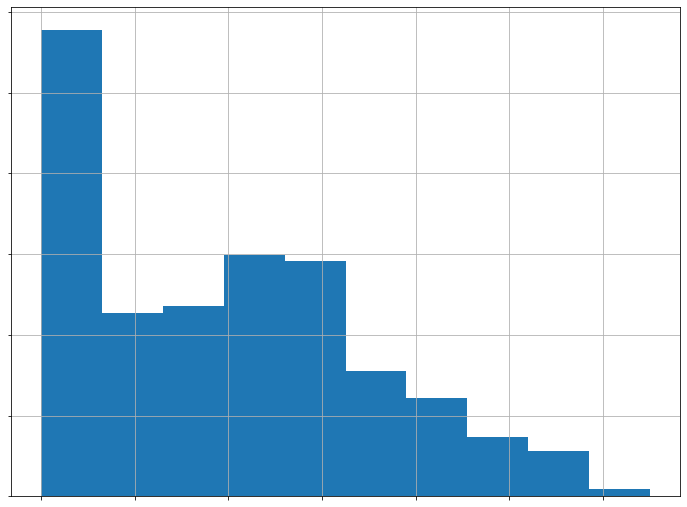

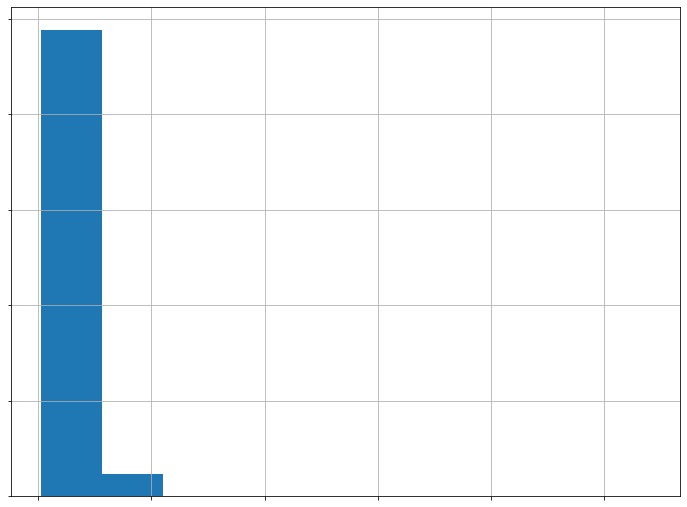

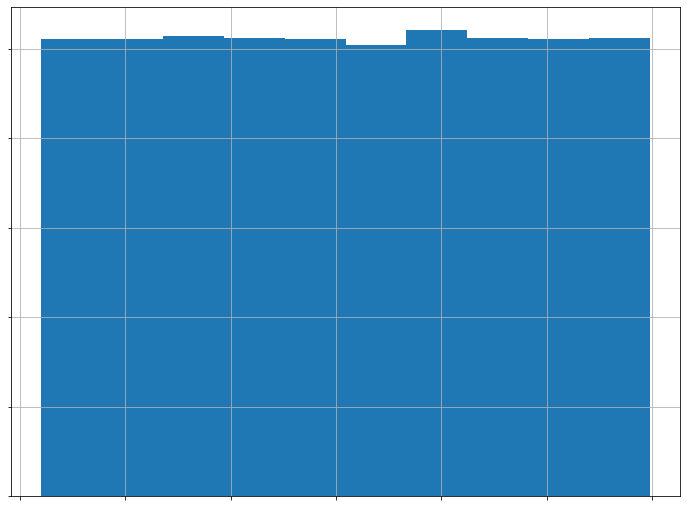

In [1831]:
for column in df[numerical_cols]:
    df[column].hist()
    plt.show()

### Considerations_
- "Age" and "Annual Premium" feature are non-normally distributed--> Log-transformation?
- "Seniority" is uniformly distributed, hence we might drop the variable

### Creating age-ranges from the feature "Age"

In [1832]:
bins = [15, 30, 40, 50, 60, 70, 100]
names = ["<30", '30-40', '40-50', '50-60', '60-70', ">70"]

df['Age'] = pd.cut(df['Age'], bins, labels=names)

<BarContainer object of 6 artists>

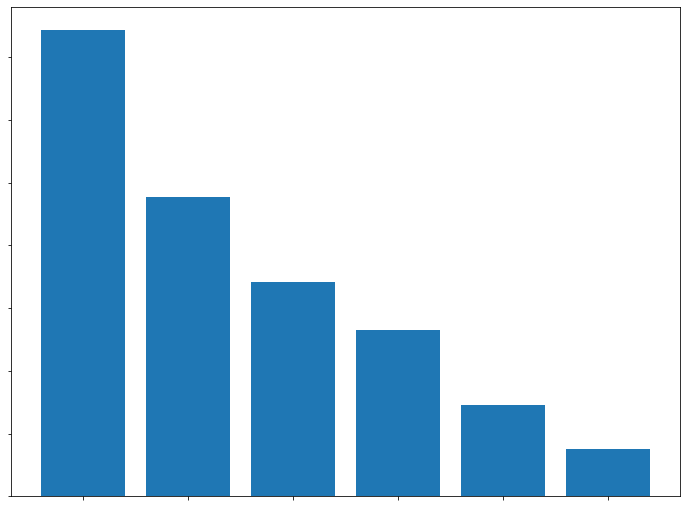

In [1833]:
plt.bar(df["Age"].value_counts().index, df["Age"].value_counts())

In [1834]:
#print(np.percentile(df["Annual_Premium"],18), np.percentile(df["Annual_Premium"],95))

In [1835]:
#print(np.percentile(df["Annual_Premium"],20), np.percentile(df["Annual_Premium"],40), np.percentile(df["Annual_Premium"],60), np.percentile(df["Annual_Premium"],80), np.percentile(df["Annual_Premium"],100))

#### Binning Annual_Premium

In [1836]:
#bins = [0, 21492, 29254, 34753, 42118, 540165]
#names = ["Upto_20_Percentile", 'Upto_40_Percentile', 'Upto_60_Percentile', "Upto_80_Percentile", "Upto_100_Pecentile"]

#df['Annual_Premium'] = pd.cut(df['Annual_Premium'], bins, labels=names)

In [1837]:
#bin_premium_group = [2600, 25000, 50000, 100000, 200000, df['Annual_Premium'].max()]
#label_bin = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']



#df['Premium_Group'] = pd.cut(df['Annual_Premium'], bins = bin_premium_group, labels = label_bin)

#### Capping Annual_Premium

In [1838]:
print(np.percentile(df["Annual_Premium"],10), np.percentile(df["Annual_Premium"],99))

2630.0 73221.0


In [1839]:
df["Poor_Insurance"] = df["Annual_Premium"]<22000

In [1840]:
df["Rich_Insurance"] = df["Annual_Premium"]> 73221

In [1841]:
df["Annual_Premium"] = df["Annual_Premium"].clip(10000, 73221)

In [1842]:
df['Log_Annual_Premium'] = np.log10(df['Annual_Premium'])
df.drop(columns=["Annual_Premium"], axis=1, inplace=True)

(array([1.7756e+04, 7.0000e+00, 1.9000e+01, 6.2000e+01, 1.5600e+02,
        3.3200e+02, 9.2600e+02, 2.0800e+03, 4.3820e+03, 7.3390e+03,
        1.0331e+04, 1.1862e+04, 1.1989e+04, 1.0675e+04, 8.3370e+03,
        6.1950e+03, 4.0970e+03, 2.4110e+03, 1.3900e+03, 2.0050e+03]),
 array([4.        , 4.04323178, 4.08646357, 4.12969535, 4.17292713,
        4.21615891, 4.2593907 , 4.30262248, 4.34585426, 4.38908605,
        4.43231783, 4.47554961, 4.51878139, 4.56201318, 4.60524496,
        4.64847674, 4.69170852, 4.73494031, 4.77817209, 4.82140387,
        4.86463566]),
 <a list of 20 Patch objects>)

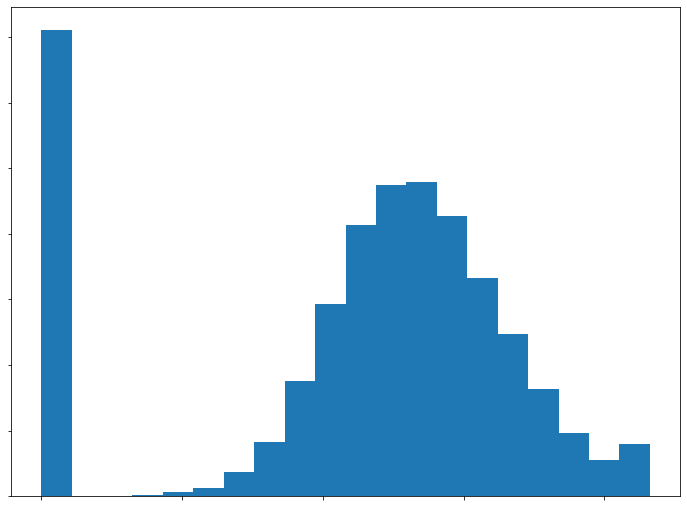

In [1843]:
plt.hist(df["Log_Annual_Premium"], bins=20)

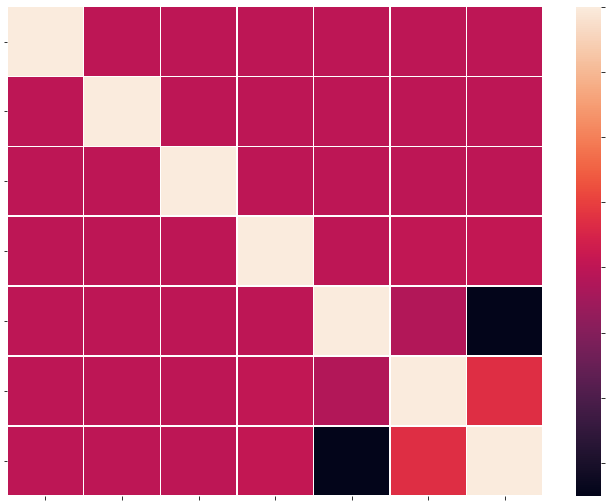

In [1844]:
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

In [1845]:
#df.drop(columns=["Licence_Type"], axis=1, inplace=True)

In [1846]:
df = pd.get_dummies(df, columns=["Gender","Age","Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Policy_Sales_Channel"])

In [1847]:
#df.drop(columns=["Annual_Premium"],axis=1, inplace=True)
df.columns

Index(['id', 'Driving_License', 'Seniority', 'Target', 'Poor_Insurance',
       'Rich_Insurance', 'Log_Annual_Premium', 'Gender_Female', 'Gender_Male',
       'Age_<30', 'Age_30-40', 'Age_40-50', 'Age_50-60', 'Age_60-70',
       'Age_>70', 'Region_Code_8', 'Region_Code_28', 'Region_Code_41',
       'Region_Code_46', 'Region_Code_Other', 'Previously_Insured_No',
       'Previously_Insured_Yes', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years', 'Vehicle_Damage_No',
       'Vehicle_Damage_Yes', 'Policy_Sales_Channel_26',
       'Policy_Sales_Channel_124', 'Policy_Sales_Channel_152',
       'Policy_Sales_Channel_Other'],
      dtype='object')

In [1848]:
#######

## MACHINE LEARNING

In [1849]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [1850]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [1851]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=123, stratify=y)

In [1852]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

ExtraTreesClassifier()

In [1853]:
len(x_train.columns)

29

In [1854]:
model.feature_importances_

array([0.00704874, 0.33800862, 0.0038652 , 0.0016475 , 0.27272784,
       0.00298649, 0.00304409, 0.01215196, 0.0075066 , 0.00451457,
       0.00218212, 0.00413888, 0.00473936, 0.00265138, 0.00496475,
       0.00234712, 0.00204649, 0.00356539, 0.05429756, 0.04995618,
       0.00427083, 0.01775588, 0.00266696, 0.08593287, 0.0747626 ,
       0.0045587 , 0.00487705, 0.01701142, 0.00377286])

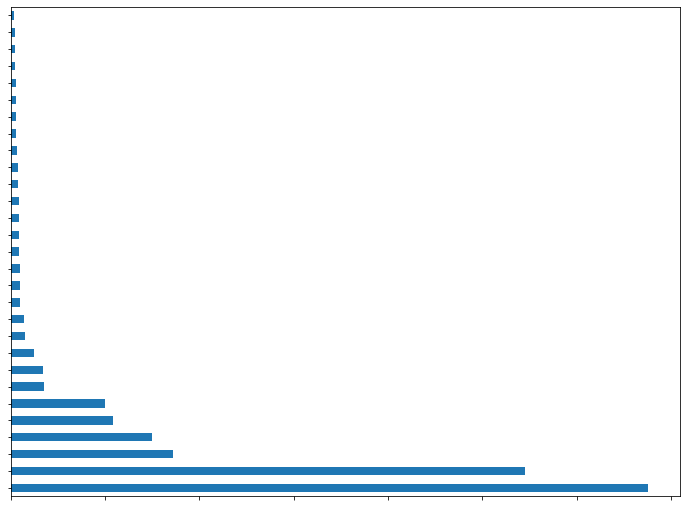

In [1855]:
pd.Series(model.feature_importances_, index=x_train.columns).nlargest(100).plot(kind='barh') 
plt.rcParams['figure.figsize'] = [12, 9]
plt.show()

### Additional drop of variables 
- 1) All before Police_Sales_Channel_26
- 2) All before Region_Code_Other

In [1856]:
#df.drop(columns=["Vehicle_Age_> 2 Years","Region_Code_46","Age_50-60","Region_Code_41","Region_Code_8","Gender_Female","Gender_Male","Region_Code_Other","Policy_Sales_Channel_Other"],axis=1, inplace=True)

In [1857]:
df.drop(columns=["Vehicle_Age_> 2 Years", "Age_50-60","Region_Code_8","Gender_Female","Gender_Male"],axis=1, inplace=True)  
#"Region_Code_41","Region_Code_46"

In [1859]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

### KNN Classifier-MinMaxScaler

In [1860]:
from sklearn.neighbors import KNeighborsClassifier

In [1861]:
scaler = MinMaxScaler()

In [1862]:
KNN = KNeighborsClassifier()

In [1863]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [1864]:
X = df.drop(columns=['Target', "id"],axis=1)


In [1865]:
y = df['Target']

In [1866]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=123, stratify=y)

In [1867]:
#df_down = pd.concat([x_train, y_train], axis=1)

In [1868]:
#df_down.Target.value_counts()

In [1869]:
#from sklearn.utils import resample

#df_majority = df_down[df.Target==0] 
#df_minority = df_down[df.Target==1] 
 
#2) Downsample majority class
#df_majority_downsampled = resample(df_majority, 
                                   #replace=False,
                                  # n_samples=25978,  # number of samples into the minority class (change it accordingly to your dataset)
                                   #random_state=123)  # reproducible results
 
#3) Combine minority class with downsampled majority class
#df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
#4) Display new class counts
#df_downsampled.Target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset"""

In [1870]:
#x_train_down = df_down.drop(columns=['Target'],axis=1)
#y_train_down = df_down['Target']

In [1871]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [1872]:
y_pred = KNN.predict(x_test)

In [1873]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))

Accuracy score is 0.7328904303649064 :
Precision score is 0.5778620166793025 :
Recall score is 0.5867590454195535 :
F1_score is 0.5822765469824293 :


In [1874]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80     13976
           1       0.58      0.59      0.58      6495

    accuracy                           0.73     20471
   macro avg       0.69      0.69      0.69     20471
weighted avg       0.73      0.73      0.73     20471



### KNN Classifier-Standard Scaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
scaler = StandardScaler()

In [ ]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [688]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [689]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=123, stratify=y)

In [694]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [695]:
y_pred = KNN.predict(x_test)

In [696]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))

Accuracy score is 0.7339162717991304 :
F1_score is 0.5857479656247624 :


### KNN with RobustScaler

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier()

In [ ]:
scaler = RobustScaler()

In [ ]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [951]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [955]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=123, stratify=y)

In [956]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [957]:
KNN.fit(x_train, y_train)

KNeighborsClassifier()

In [958]:
y_pred = KNN.predict(x_test)

In [959]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))

Accuracy score is 0.7328904303649064 :
Precision score is 0.5778620166793025 :
Recall score is 0.5867590454195535 :
F1_score is 0.5822765469824293 :


### Decision Tree Classifier- RobustScaler

In [1875]:
from sklearn.tree import DecisionTreeClassifier

In [1876]:
tree = DecisionTreeClassifier(max_depth=10, criterion="gini", min_samples_split=2, min_samples_leaf=2)

In [1877]:
scaler = RobustScaler() 

In [1878]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [1879]:
X = df.drop(columns=['Target', "id"],axis=1)


In [1880]:
y = df['Target']

In [1881]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=123, stratify=y)

In [1882]:
#X = df.drop(columns=['Target', "id"],axis=1)
#y = df['Target']

In [1883]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [1884]:
tree.fit(x_train_down, y_train_down)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2)

In [1885]:
y_pred = tree.predict(x_test)

In [1886]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy score is 0.7588295637731425 :
Precision score is 0.6010114107883817 :
Recall score is 0.7136258660508084 :
F1_score is 0.6524952488210037 :
              precision    recall  f1-score   support

           0       0.85      0.78      0.82     13976
           1       0.60      0.71      0.65      6495

    accuracy                           0.76     20471
   macro avg       0.73      0.75      0.73     20471
weighted avg       0.77      0.76      0.76     20471



### Naive Bayes Classifier - RobustScaler

In [1892]:
from sklearn.naive_bayes import GaussianNB

In [1893]:
bayes = GaussianNB()

In [1894]:
scaler = RobustScaler() 

In [1895]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [1896]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [1897]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [1898]:
bayes.fit(x_train, y_train)

GaussianNB()

In [1899]:
y_pred = bayes.predict(x_test)

In [1900]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))

Accuracy score is 0.7413902593913341 :
Precision score is 0.5560220169791958 :
Recall score is 0.9176289453425712 :
F1_score is 0.6924596258859068 :


In [1901]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.66      0.78     13976
           1       0.56      0.92      0.69      6495

    accuracy                           0.74     20471
   macro avg       0.75      0.79      0.73     20471
weighted avg       0.82      0.74      0.75     20471



### Logistic Regression - RobustScaler

In [1539]:
from sklearn.linear_model import LogisticRegression

In [1540]:
log = LogisticRegression()

In [1541]:
scaler = RobustScaler() 

In [ ]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [1542]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [1543]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [1545]:
log.fit(x_train, y_train)

LogisticRegression()

In [1546]:
y_pred = log.predict(x_test)

In [1547]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))

Accuracy score is 0.7651800107469102 :
Precision score is 0.6093831000518404 :
Recall score is 0.723941493456505 :
F1_score is 0.6617409049327987 :


## TUNING HYPERPARAMETERS

### Decision Tree Classifier- RobustScaler- Tuning

In [1902]:
from sklearn.tree import DecisionTreeClassifier

In [1903]:
tree = DecisionTreeClassifier()

In [1904]:
scaler = RobustScaler() 

In [1905]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [1906]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [1907]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [1908]:
param_grid = param_grid = [{'max_depth' : [8,9,15,20],
                            'min_samples_leaf':[2,3,4,5],
                           "criterion" : ["gini"],
                            "min_samples_split": [2,3]
                           }]

In [1911]:
CV_tree = GridSearchCV(estimator=tree, param_grid=param_grid, cv= 3,n_jobs= 1 )

In [1912]:
CV_tree.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid=[{'criterion': ['gini'], 'max_depth': [8, 9, 15, 20],
                          'min_samples_leaf': [2, 3, 4, 5],
                          'min_samples_split': [2, 3]}])

In [1914]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))
print(CV_tree.best_params_)
print(classification_report(y_test, y_pred))

Accuracy score is 0.7413902593913341 :
Precision score is 0.5560220169791958 :
Recall score is 0.9176289453425712 :
F1_score is 0.6924596258859068 :
{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     13976
           1       0.56      0.92      0.69      6495

    accuracy                           0.74     20471
   macro avg       0.75      0.79      0.73     20471
weighted avg       0.82      0.74      0.75     20471



### KNN TUNED

In [839]:
from sklearn.neighbors import KNeighborsClassifier

In [840]:
knn = KNeighborsClassifier()

In [841]:
scaler = RobustScaler() 

In [ ]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [842]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [843]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [845]:
param_grid = param_grid = [{'n_neighbors' : [5,7,9,11],
                            "weights": ["uniform", "distance"],
                            "p" : [1,2],
                            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
                           }]

In [846]:
CV_KNN = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 3,n_jobs= -1 )

In [847]:
CV_KNN.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [5, 7, 9, 11], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}])

In [848]:
y_pred = CV_KNN.predict(x_test)

In [849]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))
print(CV_KNN.best_params_)

Accuracy score is 0.7455424747203361 :
Precision score is 0.5946423314689432 :
Recall score is 0.6220169361046959 :
F1_score is 0.6080216720595981 :
{'algorithm': 'brute', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}


### Logistic Regression Tuned - RobustScaler

In [891]:
from sklearn.linear_model import LogisticRegression

In [892]:
log = LogisticRegression()

In [893]:
scaler = RobustScaler() 

In [ ]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [894]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [895]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [897]:
param_grid = param_grid = [{'penalty' : ["l1", "l2", "elasticnet", "none"],
                            "C": [0.1, 1, 10],
                            "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
                            "multi_class": ["auto", "ovr", "multinomial"]
                           }]

In [898]:
CV_log = GridSearchCV(estimator=log, param_grid=param_grid, cv= 3,n_jobs= -1 )

In [899]:
CV_log.fit(x_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10],
                          'multi_class': ['auto', 'ovr', 'multinomial'],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']}])

In [900]:
y_pred = CV_log.predict(x_test)

In [901]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))
print(CV_log.best_params_)

Accuracy score is 0.7638122221679449 :
Precision score is 0.6066563865330249 :
Recall score is 0.7268668206312549 :
F1_score is 0.6613434194858864 :
{'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'sag'}


### Ensemble Learning Methods

#### RandomForrestClassifier_Tuned

In [1915]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [1916]:
rfc = RandomForestClassifier()

In [1917]:
scaler = RobustScaler() 

In [1918]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [1919]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [1920]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [1921]:
param_grid = param_grid = [{'n_estimators' : [250,300,350],
                            "criterion": ["gini","entropy"],
                            "max_depth" : [8,9,10],
                            "min_samples_split": [4,5,6,7]
                           }]

In [1924]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3,n_jobs= 1 )

In [ ]:
CV_rfc.fit(x_train, y_train)

In [ ]:
y_pred = CV_rfc.predict(x_test)

In [1047]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))
print(CV_rfc.best_params_)

Accuracy score is 0.7714816081285721 :
Precision score is 0.6049682264586944 :
Recall score is 0.8061585835257891 :
F1_score is 0.6912211221122112 :
{'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 5, 'n_estimators': 350}


In [1048]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     13976
           1       0.60      0.81      0.69      6495

    accuracy                           0.77     20471
   macro avg       0.75      0.78      0.75     20471
weighted avg       0.80      0.77      0.78     20471



#### AdaBoostClassifier_Tuned

In [979]:
abc = AdaBoostClassifier()

In [980]:
scaler = RobustScaler() 

In [ ]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [981]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [982]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [984]:
param_grid = param_grid = [{'n_estimators' : [50,100,150],
                            "learning_rate": [0.1,0.5,1,2],
                            "algorithm" : ["SAMME", "SAMME.R"]
                           }]

In [985]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv= 3,n_jobs= -1 )

In [986]:
CV_abc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['SAMME', 'SAMME.R'],
                          'learning_rate': [0.1, 0.5, 1, 2],
                          'n_estimators': [50, 100, 150]}])

In [987]:
y_pred = CV_abc.predict(x_test)

In [988]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))
print(CV_abc.best_params_)

Accuracy score is 0.7652777099311221 :
Precision score is 0.6084445585215605 :
Recall score is 0.7299461123941493 :
F1_score is 0.6636802687758101 :
{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 150}


In [1052]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.76      0.82     13976
           1       0.60      0.81      0.69      6495

    accuracy                           0.77     20471
   macro avg       0.75      0.78      0.75     20471
weighted avg       0.80      0.77      0.78     20471



#### GradientBoostingClassifier_Tuned

In [1082]:
gbc = GradientBoostingClassifier()

In [1083]:
scaler = RobustScaler() 

In [ ]:
df[["Log_Annual_Premium", "Seniority"]] = scaler.fit_transform(df[["Log_Annual_Premium", "Seniority"]])

In [1084]:
X = df.drop(columns=['Target', "id"],axis=1)
y = df['Target']

In [1085]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20 ,random_state=1234, stratify=y)

In [1087]:
param_grid = param_grid = [{'loss' : ["exponential"],
                            "learning_rate": [.1],
                            "criterion" : [ "mse"],
                            "n_estimators": [100]
                           }]

In [1088]:
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv= 3,n_jobs= -1 )

In [1089]:
CV_gbc.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['mse'], 'learning_rate': [1],
                          'loss': ['exponential'], 'n_estimators': [100]}])

In [1090]:
y_pred = CV_gbc.predict(x_test)

In [1091]:
print("Accuracy score is {} :".format(accuracy_score(y_test, y_pred)))
print("Precision score is {} :".format(precision_score(y_test, y_pred)))
print("Recall score is {} :".format(recall_score(y_test, y_pred)))
print("F1_score is {} :".format(f1_score(y_test, y_pred)))
print(CV_gbc.best_params_)

Accuracy score is 0.7629329295100385 :
Precision score is 0.607742782152231 :
Recall score is 0.7130100076982294 :
F1_score is 0.6561813673397097 :
{'criterion': 'mse', 'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}


In [1092]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     13976
           1       0.61      0.71      0.66      6495

    accuracy                           0.76     20471
   macro avg       0.73      0.75      0.74     20471
weighted avg       0.78      0.76      0.77     20471

